<a href="https://colab.research.google.com/github/SalvatoreRomano1/net2020/blob/main/Post_Group/Network_statystics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd 
import numpy as np
import os
import networkx as nx

import statsmodels
import statsmodels.api as sm
import scipy.stats as stats
import scipy.sparse as sparse

import matplotlib.pyplot as plt

from operator import itemgetter
import operator
from collections import Counter
import random
import itertools  

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
pip install powerlaw


  Created wheel for powerlaw: filename=powerlaw-1.4.6-cp36-none-any.whl size=24788 sha256=f9829cbbb6997a5c33fb0ce2f2eb87847ef7ce6c23cd686256eb66995735d103
  Stored in directory: /root/.cache/pip/wheels/e0/27/02/08d0e2865072bfd8d7c655e290521e3feca3fc22f1ac460601
Successfully built powerlaw


In [3]:
pip install python-louvain

In [4]:
import powerlaw
import community as community_louvain

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

# Networks creation

In [6]:
#first database
biad_edges_0 = "edgelist_bipartite_hash_set0.csv" #edgelist_bipartite_hash_set1.csv
biad_nodes_0 = "nodelist_bipartite_hash_set0.csv" #nodelist_bipartite_hash_set1.csv

proj_nodes_0 = 'nodelist_projection_hash_set0.csv'  #nodelist_projection_hash_set1.csv
proj_edges_0 = 'edgelist_projection_hash_set0.csv'  #edgelist_projection_hash_set1.csv

#second database
biad_edges_1 = "edgelist_bipartite_hash_set1.csv" #edgelist_bipartite_hash_set1.csv
biad_nodes_1 = "nodelist_bipartite_hash_set1.csv" #nodelist_bipartite_hash_set1.csv

proj_nodes_1 = 'nodelist_projection_hash_set1.csv'  #nodelist_projection_hash_set1.csv
proj_edges_1 = 'edgelist_projection_hash_set1.csv'  #edgelist_projection_hash_set1.csv


In [7]:
# import the csv file first database
edgesbiad_0 = pd.read_csv(biad_edges_0,  sep=',', engine='python')
nodesbiad_0 = pd.read_csv(biad_nodes_0, sep=',', engine='python')

Gbiad_0 = nx.Graph()
Gbiad_0 = nx.from_pandas_edgelist(edgesbiad_0, 'source', 'target', ['weight'])	
data = nodesbiad_0.set_index('Id').to_dict('index').items()
Gbiad_0.add_nodes_from(data)

nodesproj_0 = pd.read_csv(proj_nodes_0, sep=',', engine='python')
edgesproj_0 = pd.read_csv(proj_edges_0,  sep=',', engine='python')

Gproj_0 = nx.Graph()
Gproj_0 = nx.from_pandas_edgelist(edgesproj_0, 'source', 'target', ['weight'])	
data = nodesproj_0.set_index('Id').to_dict('index').items()
Gproj_0.add_nodes_from(data)

In [8]:
# import the csv file second database
edgesbiad_1 = pd.read_csv(biad_edges_1,  sep=',', engine='python')
nodesbiad_1 = pd.read_csv(biad_nodes_1, sep=',', engine='python')

Gbiad_1 = nx.Graph()
Gbiad_1 = nx.from_pandas_edgelist(edgesbiad_1, 'source', 'target', ['weight'])	
data = nodesbiad_1.set_index('Id').to_dict('index').items()
Gbiad_1.add_nodes_from(data)

nodesproj_1 = pd.read_csv(proj_nodes_1, sep=',', engine='python')
edgesproj_1 = pd.read_csv(proj_edges_1,  sep=',', engine='python')

Gproj_1 = nx.Graph()
Gproj_1 = nx.from_pandas_edgelist(edgesproj_1, 'source', 'target', ['weight'])	
data = nodesproj_1.set_index('Id').to_dict('index').items()
Gproj_1.add_nodes_from(data)

# general parameter on projection

In [9]:
def average_2_3_degree(G):
  k = 0
  k_2 = 0
  k_3 = 0
  for i in range(len(G.nodes())):
    k = k+G.degree(i)
    k_2 = k_2 + G.degree(i)*G.degree(i)
    k_3 = k_3 + G.degree(i)*G.degree(i)*G.degree(i)
  k = k/len(G.nodes())
  k_2 = k_2/len(G.nodes())
  k_3 = k_3/len(G.nodes())
  return k,k_2,k_3

def degree_graph(G):
  degree_dict = dict(G.degree(G.nodes()))
  
  min_degree = degree_dict[min(degree_dict, key=degree_dict.get)]
  max_degree = degree_dict[max(degree_dict, key=degree_dict.get)]
  return degree_dict, min_degree, max_degree

def power_law(G):
  degree_sequence = sorted([d for n, d in G.degree()], reverse=True) 
  fit = powerlaw.Fit(degree_sequence) 
  alpha = fit.power_law.alpha
  return alpha

In [10]:
#fist database
k,k2,k3 = average_2_3_degree(Gproj_0)
degree_dict, min_degree, max_degree = degree_graph(Gproj_0)
alpha = power_law(Gproj_0)
degree_variance = k2 - k*k
density= nx.density(Gproj_0)
print('First database parameter')
print('Second order average degree: '+str (k2))
print('Third order average degree: '+str (k3))
print('Min degree: '+str(min_degree))
print('Max degree: '+str(max_degree))
print('Power law coefficient: '+str(alpha))
print('Variance: '+str(degree_variance))
print('Density: '+str(density))
print(nx.info(Gproj_0))

First database parameter
Second order average degree: 48.6875
Third order average degree: 818.4375
Min degree: 0
Max degree: 30
Power law coefficient: 2.4294476797920357
Variance: 28.4375
Density: 0.02830188679245283
Name: 
Type: Graph
Number of nodes: 160
Number of edges: 360
Average degree:   4.5000


Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit
/usr/local/lib/python3.6/dist-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


In [11]:
#second database
k,k2,k3 = average_2_3_degree(Gproj_1)
degree_dict, min_degree, max_degree = degree_graph(Gproj_1)
alpha = power_law(Gproj_1)
degree_variance = k2 - k*k
density= nx.density(Gproj_1)
print('Second database parameter')
print('Second order average degree: '+str (k2))
print('Third order average degree: '+str (k3))
print('Min degree: '+str(min_degree))
print('Max degree: '+str(max_degree))
print('Power law coefficient: '+str(alpha))
print('Variance: '+str(degree_variance))
print('Density: '+str(density))
print(nx.info(Gproj_1))

Second database parameter
Second order average degree: 57.9344262295082
Third order average degree: 1205.8251366120219
Min degree: 0
Max degree: 42
Power law coefficient: 3.425440409090758
Variance: 33.53190599898474
Density: 0.027142256650453372
Name: 
Type: Graph
Number of nodes: 183
Number of edges: 452
Average degree:   4.9399


Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit
/usr/local/lib/python3.6/dist-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


# diamerter and distance on projection

In [12]:
def diameter_distance_dist(G):
  if nx.is_connected(G):
    diameter = nx.diameter(G)
    ave_dist = nx.average_shortest_path_length(G)
  else:
    big = max(nx.connected_components(G), key=len)
    sub_comp = G.subgraph(big).copy() 
    diameter = nx.diameter(sub_comp)
    ave_dist = nx.average_shortest_path_length(sub_comp)
  return diameter, ave_dist

In [13]:
def path_length(G,v):
  return nx.single_source_shortest_path_length(G, v)
def path(G):
  all_path = [l for v in G for l in path_length(G,v).values()]
  count= Counter(all_path)
  label = count.keys()
  path_len = count.values()
  indexes = np.arange(len(label))
  width = 1
  plt.bar(indexes, path_len, align= 'center')# width)
  plt.xticks(indexes,label)
  plt.xlabel('Distance (links)')
  plt.ylabel('Number of path')
  plt.title('Distance distribution histogram')
  if G == Gproj_0:
    plt.savefig('Gproj_0_Distance_distibution_hist.png')
  else:
    plt.savefig('Gproj_1_Distance_distibution_hist.png')
  plt.show()

First database Network diameter: 7
First database Average path length: 3.1466003316749585


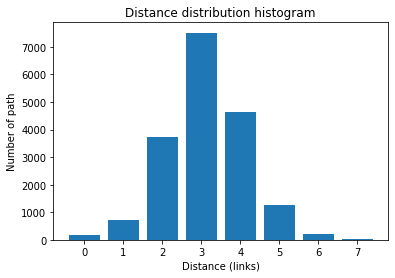

In [14]:
diameter, average_distance = diameter_distance_dist(Gproj_0)
print('First database Network diameter: '+str(diameter))
print('First database Average path length: '+str(average_distance))
path(Gproj_0)

Second database Network diameter: 7
Second database Average path length: 3.1186656480774126


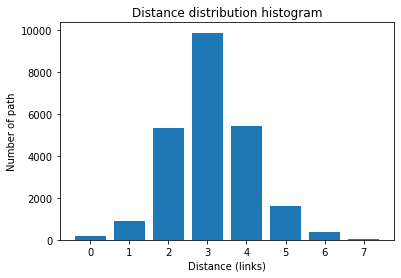

In [15]:
diameter, average_distance = diameter_distance_dist(Gproj_1)
print('Second database Network diameter: '+str(diameter))
print('Second database Average path length: '+str(average_distance))
path(Gproj_1)

# degree distribution on projection

In [56]:
def degree_found(G):
  degree_dict = dict(G.degree(G.nodes()))
  nx.set_node_attributes(G, degree_dict, 'degree')
  return degree_dict

def plot_degree_dist(G):
    degrees = [G.degree(n) for n in G.nodes()]
    plt.hist(degrees)
    plt.xlabel('Degree')
    plt.ylabel('Number of nodes')
    plt.title('Degree distribution histogram')
    if G == Gproj_0:
      plt.savefig('Gproj_0_Degree_dist_hist.png')
    else:
      plt.savefig('Gproj_1_Degree_dist_hist.png')
  
    plt.show()
    

def degree_dist(G):
  degree_sequence = sorted([d for n, d in G.degree()], reverse=True)
  count = Counter(degree_sequence)
  dict_count = dict(count)
  k = []
  Pk = []
  PK = []
  #den = G_bi.number_of_nodes()
  den = G.number_of_nodes()
  for key,value in dict_count.items():
    if key != 0:
      k.append(key)
      Pk.append(count[key]/den)
  arr_k = np.array(k)
  arr_Pk = np.array(Pk)
  plt.title('Log-Log PDF function')
  plt.xlabel('k')
  plt.ylabel('PDF')

  plt.loglog(k,Pk, 'o', label = "log PDF")
  m, c = np.polyfit(np.log(arr_k), np.log(arr_Pk), 1, w=np.sqrt(arr_Pk)) 
  Pk_fit = np.exp(m*np.log(arr_k) + c) 
  plt.loglog(arr_k, Pk_fit, '-', label = r'$C  P_k$')
  plt.grid(True, which = 'both')
  plt.legend()
  if G == Gproj_0:
    plt.savefig('Gproj_0_Degree_dist.png')
  else:
    plt.savefig('Gproj_1_Degree_dist.png')


def degree_dist_CCDF(G):
  degree_sequence = sorted([d for n, d in G.degree()], reverse=True)
  count = Counter(degree_sequence)
  dict_count = dict(count)
  k = []
  Pk = []
  PK = []
  den = G.number_of_nodes()
  for key,value in dict_count.items():
    if key != 0:
      k.append(key)
      Pk.append(count[key]/den)
  PK = np.cumsum(Pk)
  arr_k = np.array(k)
  arr_Pk = np.array(Pk)
  arr_PK = np.array(PK)
  plt.grid(True, which = 'both')
  plt.title('Log-Log CCDF function')
  plt.xlabel('k')
  plt.ylabel('CCDF')

  plt.loglog(k,PK, 'o',label = 'log CCDF')
  m, c = np.polyfit(np.log(arr_k), np.log(arr_PK), 1, w=np.sqrt(arr_Pk)) 
  PK_fit = np.exp(m*np.log(arr_k) + c) 
  plt.loglog(arr_k, PK_fit, '-',label = r'$C  P_k$')
  plt.legend()
  if G == Gproj_0:
    plt.savefig('Gproj_0_CCDF_dist.png')
  else:
    plt.savefig('Gproj_1_CCDF_dist.png')

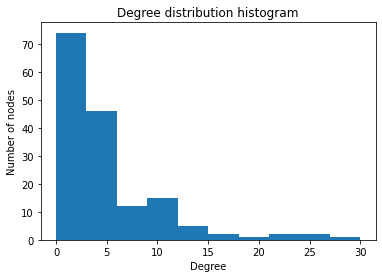

In [57]:
#first database
degree_dict_0 = degree_found(Gproj_0)
plot_degree_dist(Gproj_0)

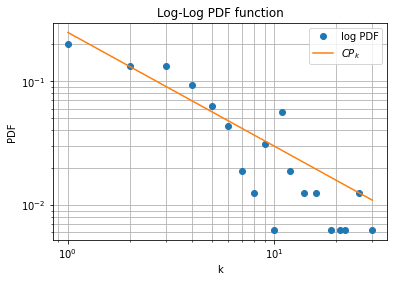

In [19]:
#first database
degree_dist(Gproj_0)

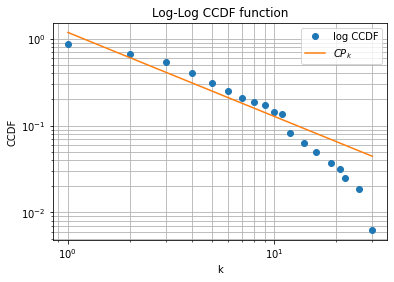

In [20]:
#first database
degree_dist_CCDF(Gproj_0)

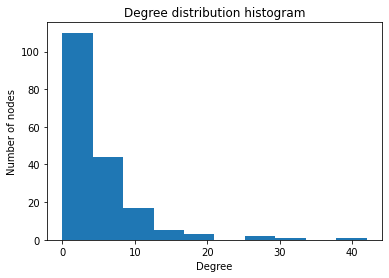

In [58]:
#second database
degree_dict_1 = degree_found(Gproj_1)
plot_degree_dist(Gproj_1)

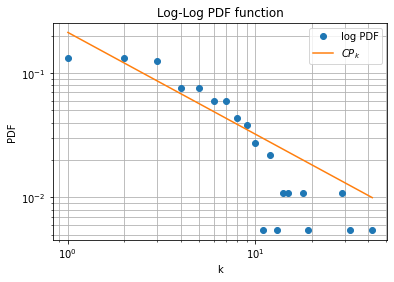

In [22]:
#second database
degree_dist(Gproj_1)

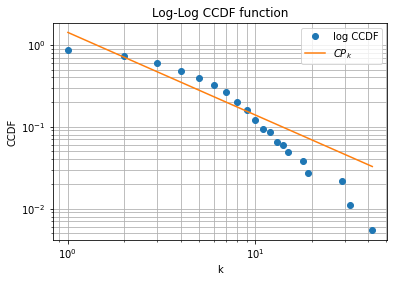

In [23]:
#second database
degree_dist_CCDF(Gproj_1)

# cluster coefficient on both

In [24]:
def disconnected_check(G):
  if not nx.is_connected(G):
    big = max(nx.connected_components(G), key=len)
    g = G.subgraph(big).copy() 
  return g

def proj_net_coef(G):
  degree_dict = degree_found(G)
  nodes = list(degree_dict.keys())
  degree_list = list(degree_dict.values())
  degree_set = set()
  for i in range(len(degree_list)):
    degree_set.add(degree_list[i])
  return degree_set,degree_dict

def cluster_average(G,degree_set,degree_dict):
  cluster_val = []
  for degree in degree_set:
    temp_node = [key for (key,value) in degree_dict.items() if value == degree] 
    temp = nx.average_clustering(G, nodes=temp_node)
    cluster_val.append(temp)
  return cluster_val

def cluster_single(G):
  cluster_val_single = []
  for node in G.nodes():
    temp = nx.clustering(G, nodes=node)
    cluster_val_single.append(temp)
  return cluster_val_single

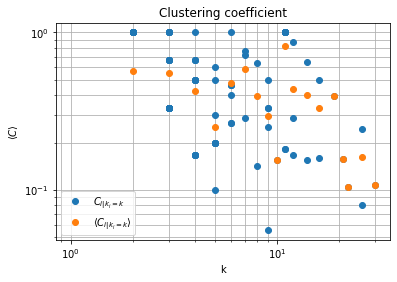

In [25]:
G_coeff_0 = disconnected_check(Gproj_0)
degree_set,degree_dict = proj_net_coef(G_coeff_0)
cluster_val = cluster_average(G_coeff_0, degree_set,degree_dict)
cluster_single_val = cluster_single(G_coeff_0)

degree_list = list(degree_dict.values())
degree_set_list = list(degree_set)
plt.title('Clustering coefficient')
plt.xlabel('k')
plt.ylabel(r'$\langle C \rangle$')
plt.grid(True, which = 'both')
plt.loglog(degree_list,cluster_single_val, 'o', label = r'$C_{i|k_i = k}$')
plt.loglog(degree_set_list,cluster_val, 'o', label = r'$\langle C_{i|k_i = k} \rangle$')
plt.legend(loc='lower left')
plt.savefig('Gproj_0_clustering_coeff')

In [26]:
avg_pr = nx.average_clustering(G_coeff_0)
print('First database Average clustering coefficient: '+ str(avg_pr))

natural_cut = 1*(pow(Gproj_0.number_of_nodes(),1/(alpha-1)))
print('First database Natural cutoff: '+ str(natural_cut))

First database Average clustering coefficient: 0.3795622381920023
First database Natural cutoff: 8.104951433046507


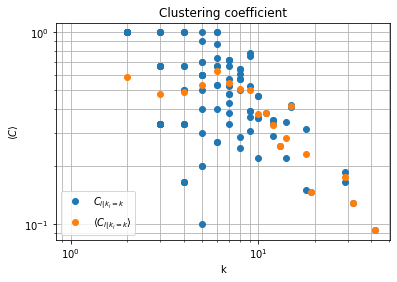

In [27]:
G_coeff_1 = disconnected_check(Gproj_1)
degree_set,degree_dict = proj_net_coef(G_coeff_1)
cluster_val = cluster_average(G_coeff_1, degree_set,degree_dict)
cluster_single_val = cluster_single(G_coeff_1)

degree_list = list(degree_dict.values())
degree_set_list = list(degree_set)
plt.title('Clustering coefficient')
plt.xlabel('k')
plt.ylabel(r'$\langle C \rangle$')
plt.grid(True, which = 'both')
plt.loglog(degree_list,cluster_single_val, 'o', label = r'$C_{i|k_i = k}$')
plt.loglog(degree_set_list,cluster_val, 'o', label = r'$\langle C_{i|k_i = k} \rangle$')
plt.legend(loc='lower left')
plt.savefig('Gproj_1_clustering_coeff')


In [28]:
avg_pr = nx.average_clustering(G_coeff_1)
print('Second database Average clustering coefficient: '+ str(avg_pr))

natural_cut = 1*(pow(Gproj_1.number_of_nodes(),1/(alpha-1)))
print('Second database Natural cutoff: '+ str(natural_cut))

Second database Average clustering coefficient: 0.4294454447394393
Second database Natural cutoff: 8.566434801453925


In [30]:
def bipartite_cluster(G):
  cluster_val_p1 = []
  cluster_val_p2 = []

  if nx.is_connected(G):
    for node in G.nodes():
      temp = nx.square_clustering(G, nodes=node)
      if G.nodes[node]['type'] == 'hashtag':
        cluster_val_p1.append(temp)
      else:
        cluster_val_p2.append(temp)
  else:
    big = max(nx.connected_components(G), key=len)
    sub_comp = G.subgraph(big).copy() 
    for node in sub_comp.nodes():
      temp = nx.square_clustering(sub_comp, nodes=node)
      if sub_comp.nodes[node]['type'] == 'hashtag':
        cluster_val_p1.append(temp)
      else:
        cluster_val_p2.append(temp)

  return cluster_val_p1, cluster_val_p2
    
def multiple_dict(G):
  if nx.is_connected(G):
    degree_dict = degree_found(G)
  else:
    big = max(nx.connected_components(G), key=len)
    sub_comp = G.subgraph(big).copy() 
    degree_dict = degree_found(sub_comp)

  len_hash = 0
  for node in G.nodes():
    if G.nodes[node]['type'] == 'hashtag':
      len_hash = len_hash+1

  dict_v1 = {key:val for key, val in degree_dict.items() if key < len_hash}
  degree_list_v1 = list(dict_v1.values())
  dict_v2 = {key:val for key, val in degree_dict.items() if key >= len_hash}
  degree_list_v2 = list(dict_v2.values())
  return degree_list_v1,degree_list_v2
  #return dict_v1,dict_v2

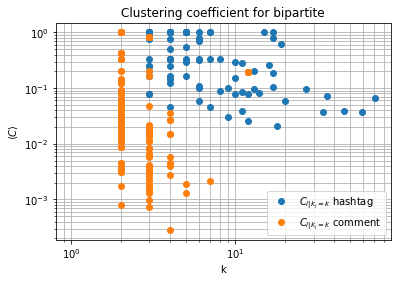

In [31]:
cluster_val_p1, cluster_val_p2 = bipartite_cluster(Gbiad_0)
degree_list_v1,degree_list_v2 = multiple_dict(Gbiad_0)

plt.title('Clustering coefficient for bipartite')
plt.xlabel('k')
plt.ylabel(r'$\langle C \rangle$')
#plt.grid(True, which = 'both')
plt.loglog(degree_list_v1, cluster_val_p1, 'o', label = r'$C_{i|k_i = k}$ hashtag')
plt.loglog(degree_list_v2, cluster_val_p2, 'o', label = r'$C_{i|k_i = k}$ comment')
plt.grid(True, which = 'both')
plt.legend()
plt.savefig('Gbiad_0_Bipartite_cluster_coef.png')

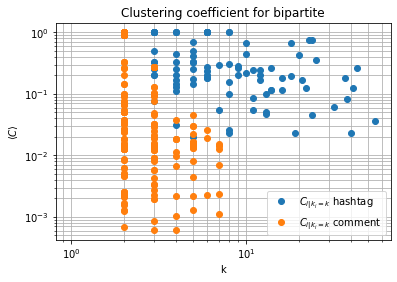

In [32]:
cluster_val_p1, cluster_val_p2 = bipartite_cluster(Gbiad_1)
degree_list_v1,degree_list_v2 = multiple_dict(Gbiad_1)

plt.title('Clustering coefficient for bipartite')
plt.xlabel('k')
plt.ylabel(r'$\langle C \rangle$')
#plt.grid(True, which = 'both')
plt.loglog(degree_list_v1, cluster_val_p1, 'o', label = r'$C_{i|k_i = k}$ hashtag')
plt.loglog(degree_list_v2, cluster_val_p2, 'o', label = r'$C_{i|k_i = k}$ comment')
plt.grid(True, which = 'both')
plt.legend()
plt.savefig('Gbiad_1_Bipartite_cluster_coef.png')

# Assortativity only on projection

In [33]:
def assortativity(G):
  
  avg_neighbor = nx.average_neighbor_degree(G)   
  avg_neighboor_k = nx.k_nearest_neighbors(G)

  degree = [G.degree(n) for n in G.nodes()]
  avg = list(avg_neighbor.values())

  degree_k = list(avg_neighboor_k.keys())
  avg_k = list(avg_neighboor_k.values())

  plt.loglog(degree, avg,'o',label = 'average of neighbours')
  plt.loglog(degree_k, avg_k,'o',label = 'average for each k')

  degree_k = np.array(degree_k)
  avg_k = np.array(avg_k)

  '''a = np.log(degree_k)
  b = np.log(avg_k)
  a[np.isneginf(a)] = 0
  b[np.isneginf(b)] = 0

  m, c = np.polyfit(np.log(degree_k),np.log(avg_k), 1, w=np.sqrt(avg_k)) 
  avg_neigh_fit = np.exp(m*degree_k + c)
  plt.loglog(degree_k, avg_neigh_fit, '-')'''

  plt.xlabel("k")
  plt.ylabel(r'$ k_{nn}$')
  plt.grid(True, which = 'both')
  plt.legend()

  plt.title('Degree Assortativity')
  if G == Gproj_0:
    plt.savefig('Gproj_0_Degree_Assortativity.png')
  else:
    plt.savefig('Gproj_1_Degree_Assortativity.png')
  plt.show()

  

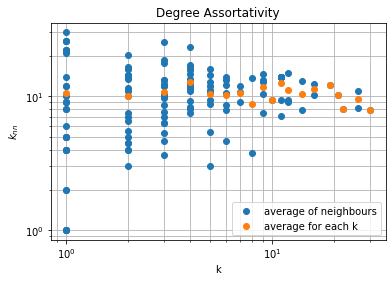

First database Degree asortativity: -0.06997461301968143


In [34]:
assortativity(Gproj_0)
ass_deg = nx.degree_assortativity_coefficient(Gproj_0)
print('First database Degree asortativity: '+ str(ass_deg))

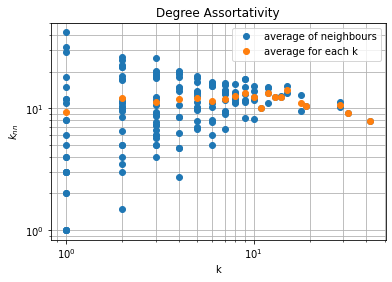

Second database Degree asortativity: -0.08088010449282926


In [35]:
assortativity(Gproj_1)
ass_deg = nx.degree_assortativity_coefficient(Gproj_1)
print('Second database Degree asortativity: '+ str(ass_deg))

In [36]:
def emo_assortativity(G):
  if nx.is_connected(G):
    g = G.copy()
  else:
    big = max(nx.connected_components(G), key=len)
    g = G.subgraph(big).copy() 

  emo = []
  for node in g.nodes():
    value = g.nodes[node]['Emo_Neg']
    value = round(value, 2)
    emo.append(value)

  avg_emo = [] 
  for node in g.nodes():
    node_neighbor = g.neighbors(node)
    sum = 0
    count = 0
    for i in node_neighbor:
      sum = sum+g.nodes[i]['Emo_Neg']
      count = count+1
    avg_emo.append(sum/count)

  emo_dict = dict(zip(emo,avg_emo))
  emo_k = list(emo_dict.keys())
  avg_emo_k = list(emo_dict.values())



  plt.loglog(emo, avg_emo,'o',label = 'average of neighbours')
  plt.loglog(emo_k,avg_emo_k,'o',label = 'average for each k')
  emo_k = np.array(emo_k)
  avg_emo_k = np.array(avg_emo_k)
  plt.grid(True, which = 'both')
  '''a = np.log(emo_k)
  b = np.log(avg_emo_k)
  a[np.isneginf(a)] = 0
  b[np.isneginf(b)] = 0
  m, c = np.polyfit(a,b, 1, w=np.sqrt(avg_emo_k)) 
  avg_neigh_fit = np.exp(m*emo_k + c)
  plt.loglog(emo_k, avg_neigh_fit, '-')'''
  plt.xlabel("Emo")
  plt.ylabel(r'$ Emo_{nn}$')
  plt.legend()

  plt.title('Emo Assortativity')
  if G == Gproj_0:
    plt.savefig('Gproj_0_Emo_Assortativity.png')
  else:
    plt.savefig('Gproj_1_Emo_Assortativity.png')
  
  plt.show()




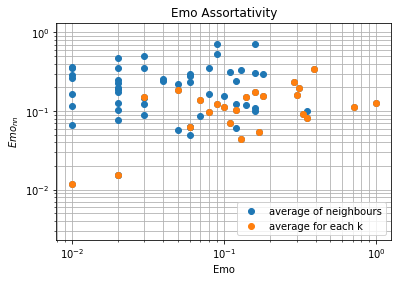

First database asortativity: 0.08929846365391227


In [37]:
emo_assortativity(Gproj_0)
ass_emo = nx.attribute_assortativity_coefficient(Gproj_0, 'Emo_Neg')
print('First database emo asortativity: '+ str(ass_emo))

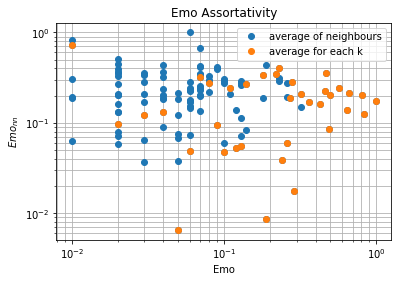

Second database asortativity: -0.001328695040626923


In [38]:
emo_assortativity(Gproj_1)
ass_emo = nx.attribute_assortativity_coefficient(Gproj_1, 'Emo_Neg')
print('Second database emo asortativity: '+ str(ass_emo))

# robustness on both


In [39]:
def emo_dict(nodes):
  label = nodes['Id'].values
  label = label.tolist()
  emo = nodes["Emo_Neg"].to_numpy()
  emo = emo.tolist()
  emo_dictionary = dict(zip(label,emo))
  return emo_dictionary


def robustness(G, dict_characteristic, reverse = True):
    g = G.copy()
    
    m = dict_characteristic
    l = sorted(m.items(), key = operator.itemgetter(1), reverse = reverse)
    
    x = []
    y = []
    largest_component = max(nx.connected_components(g), key = len)
    n = g.number_of_nodes()
    x.append(0)
    y.append(len(largest_component) * 1. / n)
    
    R = 0.0
    
    for i in range(1, n):#len(emo_dictionary)):
      temp = l.pop(0)[0]
      if temp in G:
        g.remove_node(temp)
        largest_component = max(nx.connected_components(g), key = len)
        x.append(i * 1. / n)
        #x.append(i)
        R += len(largest_component) * 1. / n
        y.append(len(largest_component) * 1. / n)
     
    return x, y, 0.5 - R / n

def robustness_failure(G, dict_characteristic, reverse = True):
  g = G.copy()

  x = []
  y = []
  largest_component = max(nx.connected_components(g), key = len)
  n = g.number_of_nodes()
  x.append(0)
  y.append(len(largest_component) * 1. / n)
  m = dict_characteristic   
  R = 0.0

  for i in range(1, n):
    keys =  list(m.keys())
    random.shuffle(keys)
    shuffled_m = dict()
    for key in keys:
      shuffled_m.update({key:m[key]})
    m = shuffled_m

    temp = list(m.keys())[0]
    del m[temp]

    if temp in g:
      g.remove_node(temp)
      largest_component = max(nx.connected_components(g), key = len)
      x.append(i * 1. / n)  
      R += len(largest_component) * 1. / n
      y.append(len(largest_component) * 1. / n)
  return x, y, 0.5 - R / n


First database Attack robustness on emo on projection: 0.29683593749999954
First database Failure robustness on emo on projection: 0.13210937499999997
Second database Attack robustness on emo on projection: 0.29079697811221694
Second database Failure robustness on emo on projection: 0.18747947087103284


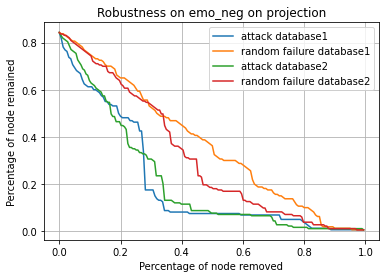

In [40]:
emo_dictionary_pr_0 = emo_dict(nodesproj_0)
x_pr_emo_0, y_pr_emo_0, R_pr_emo_0 = robustness(Gproj_0,emo_dictionary_pr_0)
x_fail_pr_emo_0, y_fail_pr_emo_0, R_fail_pr_emo_0 = robustness_failure(Gproj_0,emo_dictionary_pr_0)
print('First database Attack robustness on emo on projection: ' +str(R_pr_emo_0))
print('First database Failure robustness on emo on projection: ' +str(R_fail_pr_emo_0))

emo_dictionary_pr_1 = emo_dict(nodesproj_1)
x_pr_emo_1, y_pr_emo_1, R_pr_emo_1 = robustness(Gproj_1,emo_dictionary_pr_1)
x_fail_pr_emo_1, y_fail_pr_emo_1, R_fail_pr_emo_1 = robustness_failure(Gproj_1,emo_dictionary_pr_1)
print('Second database Attack robustness on emo on projection: ' +str(R_pr_emo_1))
print('Second database Failure robustness on emo on projection: ' +str(R_fail_pr_emo_1))

plt.title('Robustness on emo_neg on projection')
plt.xlabel('Percentage of node removed')
plt.ylabel('Percentage of node remained')
plt.plot(x_pr_emo_0,y_pr_emo_0, label = 'attack database1')
plt.plot(x_fail_pr_emo_0, y_fail_pr_emo_0, label = 'random failure database1')
plt.plot(x_pr_emo_1,y_pr_emo_1, label = 'attack database2')
plt.plot(x_fail_pr_emo_1, y_fail_pr_emo_1, label = 'random failure database2')
plt.grid(True)
plt.legend()
plt.savefig('Both_projection_database_emo_robustnes_proj.png')

First database Attack robustness on emo on bipartite: 0.3558375250471152
First database Failure robustness on emo on bipartite: 0.25371751899453787
Second database Attack robustness on emo on bipartite: 0.2753458518057885
Second database Failure robustness on emo on bipartite: 0.24898542252378664


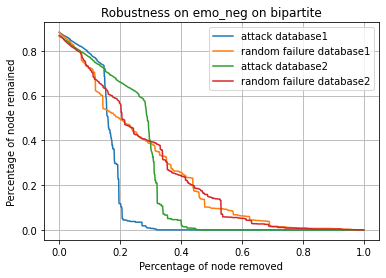

In [41]:
emo_dictionary_pr_0 = emo_dict(nodesbiad_0)
x_pr_emo_0, y_pr_emo_0, R_pr_emo_0 = robustness(Gbiad_0,emo_dictionary_pr_0)
x_fail_pr_emo_0, y_fail_pr_emo_0, R_fail_pr_emo_0 = robustness_failure(Gbiad_0,emo_dictionary_pr_0)
print('First database Attack robustness on emo on bipartite: ' +str(R_pr_emo_0))
print('First database Failure robustness on emo on bipartite: ' +str(R_fail_pr_emo_0))

emo_dictionary_pr_1 = emo_dict(nodesbiad_1)
x_pr_emo_1, y_pr_emo_1, R_pr_emo_1 = robustness(Gbiad_1,emo_dictionary_pr_1)
x_fail_pr_emo_1, y_fail_pr_emo_1, R_fail_pr_emo_1 = robustness_failure(Gbiad_1,emo_dictionary_pr_1)
print('Second database Attack robustness on emo on bipartite: ' +str(R_pr_emo_1))
print('Second database Failure robustness on emo on bipartite: ' +str(R_fail_pr_emo_1))

plt.title('Robustness on emo_neg on bipartite')
plt.xlabel('Percentage of node removed')
plt.ylabel('Percentage of node remained')
plt.plot(x_pr_emo_0,y_pr_emo_0, label = 'attack database1')
plt.plot(x_fail_pr_emo_0, y_fail_pr_emo_0, label = 'random failure database1')
plt.plot(x_pr_emo_1,y_pr_emo_1, label = 'attack database2')
plt.plot(x_fail_pr_emo_1, y_fail_pr_emo_1, label = 'random failure database2')
plt.grid(True)
plt.legend()
plt.savefig('Both_bipartite_database_emo_robustnes_bi.png')

First database Attack robustness on degree on projection: 0.3896484374999998
First database Failure robustness on degree on projection: 0.18832031249999998
Second database Attack robustness on degree on projection: 0.3850667383319896
Second database Failure robustness on degree on projection: 0.11838215533458696


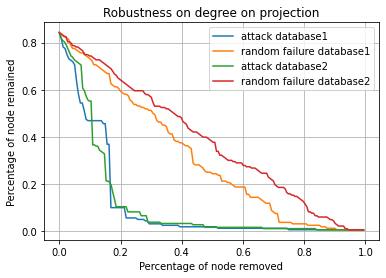

In [42]:
degree_dict_pr_0 = degree_found(Gproj_0)
x_pr_deg_0, y_pr_deg_0, R_pr_deg_0 = robustness(Gproj_0,degree_dict_pr_0)
x_fail_pr_deg_0, y_fail_pr_deg_0, R_fail_pr_deg_0 = robustness_failure(Gproj_0,degree_dict_pr_0)
print('First database Attack robustness on degree on projection: ' +str(R_pr_deg_0))
print('First database Failure robustness on degree on projection: ' +str(R_fail_pr_deg_0))

degree_dict_pr_1 = degree_found(Gproj_1)
x_pr_deg_1, y_pr_deg_1, R_pr_deg_1 = robustness(Gproj_1,degree_dict_pr_1)
x_fail_pr_deg_1, y_fail_pr_deg_1, R_fail_pr_deg_1 = robustness_failure(Gproj_1,degree_dict_pr_1)
print('Second database Attack robustness on degree on projection: ' +str(R_pr_deg_1))
print('Second database Failure robustness on degree on projection: ' +str(R_fail_pr_deg_1))

plt.title('Robustness on degree on projection')
plt.xlabel('Percentage of node removed')
plt.ylabel('Percentage of node remained')
plt.plot(x_pr_deg_0,y_pr_deg_0, label = 'attack database1')
plt.plot(x_fail_pr_deg_0, y_fail_pr_deg_0, label = 'random failure database1')
plt.plot(x_pr_deg_1,y_pr_deg_1, label = 'attack database2')
plt.plot(x_fail_pr_deg_1, y_fail_pr_deg_1, label = 'random failure database2')
plt.grid(True)
plt.legend()
plt.savefig('Both_projection_database_deg_robustnes_proj.png')

First database Attack robustness on degree: 0.4790807881186115
First database Failure robustness on degree: 0.2146910206383627
Second database Attack robustness on degree on bipartite: 0.47674074799956767
Second database Failure robustness on degree on bipartite: 0.23512347264273314


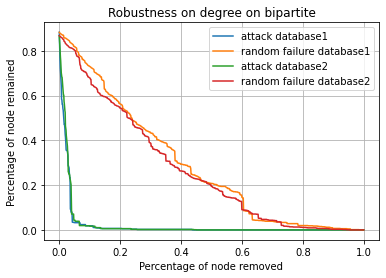

In [43]:
degree_dict_pr_0 = degree_found(Gbiad_0)
x_pr_deg_0, y_pr_deg_0, R_pr_deg_0 = robustness(Gbiad_0,degree_dict_pr_0)
x_fail_pr_deg_0, y_fail_pr_deg_0, R_fail_pr_deg_0 = robustness_failure(Gbiad_0,degree_dict_pr_0)
print('First database Attack robustness on degree: ' +str(R_pr_deg_0))
print('First database Failure robustness on degree: ' +str(R_fail_pr_deg_0))

degree_dict_pr_1 = degree_found(Gbiad_1)
x_pr_deg_1, y_pr_deg_1, R_pr_deg_1 = robustness(Gbiad_1,degree_dict_pr_1)
x_fail_pr_deg_1, y_fail_pr_deg_1, R_fail_pr_deg_1 = robustness_failure(Gbiad_1,degree_dict_pr_1)
print('Second database Attack robustness on degree on bipartite: ' +str(R_pr_deg_1))
print('Second database Failure robustness on degree on bipartite: ' +str(R_fail_pr_deg_1))

plt.title('Robustness on degree on bipartite')
plt.xlabel('Percentage of node removed')
plt.ylabel('Percentage of node remained')
plt.plot(x_pr_deg_0,y_pr_deg_0, label = 'attack database1')
plt.plot(x_fail_pr_deg_0, y_fail_pr_deg_0, label = 'random failure database1')
plt.plot(x_pr_deg_1,y_pr_deg_1, label = 'attack database2')
plt.plot(x_fail_pr_deg_1, y_fail_pr_deg_1, label = 'random failure database2')
plt.grid(True)
plt.legend()
plt.savefig('Both_projection_database_deg_robustnes_bi.png')

# page rank only on projection

In [44]:
def page_hist(G):
  if nx.is_connected(G):
    pagerank = nx.pagerank(G)
    hits = nx.hits(G, max_iter = 300)
  else:
    big = max(nx.connected_components(G), key=len)
    sub_comp = G.subgraph(big).copy() 
    pagerank = nx.pagerank(sub_comp)
    hits = nx.hits(sub_comp, max_iter = 300)

  value_pagerank = list(pagerank.values())
  autority = hits[1]
  value_autority = list(autority.values())

  neg_pagerank = []
  for i in range(len(value_pagerank)):
    neg_pagerank.append(-1*value_pagerank[i])

  return value_pagerank, neg_pagerank, value_autority

def top_pagerank(G,num):
  if nx.is_connected(G):
    pagerank = nx.pagerank(G)
  else:
    big = max(nx.connected_components(G), key=len)
    sub_comp = G.subgraph(big).copy() 
    pagerank = nx.pagerank(sub_comp)

  sorted_pagerank = sorted(pagerank.items(), key=itemgetter(1), reverse=True)
  top_pagerank = sorted_pagerank[:num]
  return top_pagerank


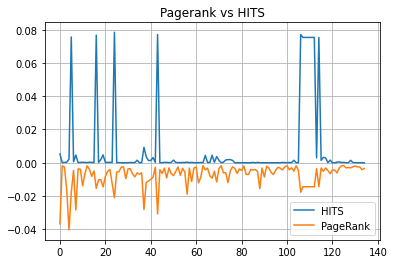

In [45]:
pagerank_0, neg_pagerank_0, hits_0 = page_hist(Gproj_0)
plt.title('Pagerank vs HITS')
plt.grid(True)
plt.plot(hits_0, label = 'HITS')
plt.plot(neg_pagerank_0, label = 'PageRank')
plt.legend()
plt.savefig('Gproj_0_pagerank_hits.png')

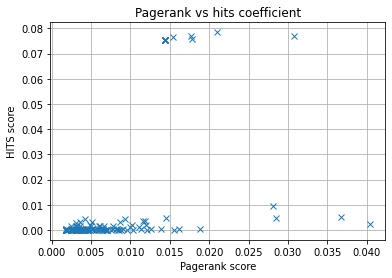

In [46]:
plt.title('Pagerank vs hits coefficient')
plt.grid(True)
plt.xlabel('Pagerank score')
plt.ylabel('HITS score')
plt.plot(pagerank_0,hits_0, 'x')
plt.savefig('Gproj_0_pagerank_hits_score.png')

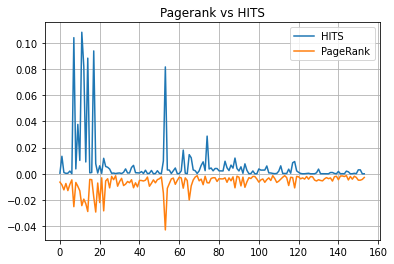

In [47]:
pagerank_1, neg_pagerank_1, hits_1 = page_hist(Gproj_1)
plt.title('Pagerank vs HITS')
plt.grid(True)
plt.plot(hits_1, label = 'HITS')
plt.plot(neg_pagerank_1, label = 'PageRank')
plt.legend()
plt.savefig('Gproj_1_pagerank_hits.png')

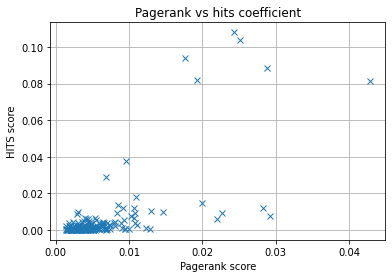

In [48]:
plt.title('Pagerank vs hits coefficient')
plt.grid(True)
plt.xlabel('Pagerank score')
plt.ylabel('HITS score')
plt.plot(pagerank_1,hits_1, 'x')
plt.savefig('Gproj_1_pagerank_hits_score.png')

First database Hashtag number pageRank: dict_keys([11, 0, 58, 14, 61, 46, 48, 75, 44, 4, 25, 96, 38, 97, 98, 99, 100, 101, 102, 95])


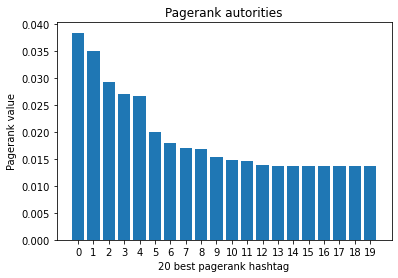

In [49]:
page_r = nx.pagerank(Gproj_0)
sorted_page = dict(sorted(page_r.items(), key=itemgetter(1), reverse=True))
top_20_rank = dict(itertools.islice(sorted_page.items(), 20))
values_pr = top_20_rank.values()
x_pr = np.arange(len(values_pr))

print('First database Hashtag number pageRank: '+ str(top_20_rank.keys()))

plt.bar(x_pr,values_pr, align= 'center')
plt.xticks(x_pr)
plt.xlabel('20 best pagerank hashtag')
plt.ylabel('Pagerank value')
plt.title('Pagerank autorities')
plt.savefig('Gproj_0_Pagerank_aut.png')
plt.show()

First database Hashtag number hits: dict_keys([46, 58, 44, 96, 75, 97, 98, 99, 100, 101, 102, 95, 61, 0, 38, 14, 64, 148, 73, 7])


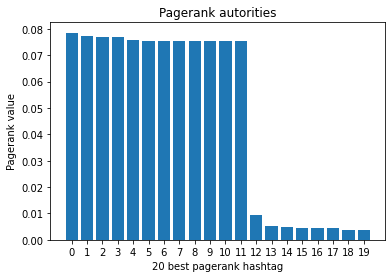

In [50]:
hits = nx.hits(Gproj_0, max_iter = 300)
aut= hits[1]
sorted_h = dict(sorted(aut.items(), key=itemgetter(1), reverse=True))
top_20_h = dict(itertools.islice(sorted_h.items(), 20))
values_h = top_20_h.values()
x_h = np.arange(len(values_h))

print('First database Hashtag number hits: '+ str(top_20_h.keys()))

plt.bar(x_h,values_h, align= 'center')
plt.xticks(x_h)
plt.xlabel('20 best pagerank hashtag')
plt.ylabel('Pagerank value')
plt.title('Pagerank autorities')
plt.savefig('Gproj_0_Hist_aut.png')
plt.show()

Second database Hashtag number pageRank: dict_keys([11, 3, 27, 19, 129, 53, 26, 6, 31, 94, 159, 10, 12, 111, 103, 13, 52, 99, 34, 100])


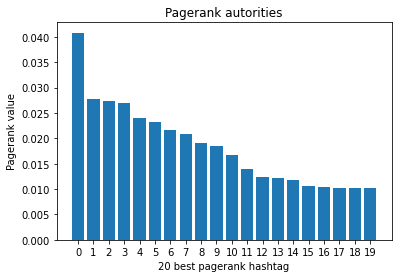

In [51]:
page_r = nx.pagerank(Gproj_1)
sorted_page = dict(sorted(page_r.items(), key=itemgetter(1), reverse=True))
top_20_rank = dict(itertools.islice(sorted_page.items(), 20))
values_pr = top_20_rank.values()
x_pr = np.arange(len(values_pr))

print('Second database Hashtag number pageRank: '+ str(top_20_rank.keys()))

plt.bar(x_pr,values_pr, align= 'center')
plt.xticks(x_pr)
plt.xlabel('20 best pagerank hashtag')
plt.ylabel('Pagerank value')
plt.title('Pagerank autorities')
plt.savefig('Gproj_1_Pagerank_aut.png')
plt.show()

Second database Hashtag number hits: dict_keys([53, 129, 159, 27, 94, 11, 68, 158, 52, 31, 1, 41, 100, 19, 12, 10, 48, 99, 154, 26])


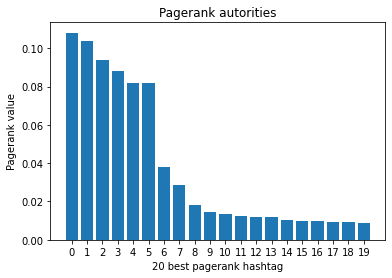

In [52]:
hits = nx.hits(Gproj_1, max_iter = 300)
aut= hits[1]
sorted_h = dict(sorted(aut.items(), key=itemgetter(1), reverse=True))
top_20_h = dict(itertools.islice(sorted_h.items(), 20))
values_h = top_20_h.values()
x_h = np.arange(len(values_h))

print('Second database Hashtag number hits: '+ str(top_20_h.keys()))

plt.bar(x_h,values_h, align= 'center')
plt.xticks(x_h)
plt.xlabel('20 best pagerank hashtag')
plt.ylabel('Pagerank value')
plt.title('Pagerank autorities')
plt.savefig('Gproj_1_Hist_aut.png')
plt.show()

# Community on projection

In [53]:
def louv_mod(G,resolution):
  if nx.is_connected(G):
    modularity_dict = community_louvain.best_partition(G,resolution=2.0)
    mod = community_louvain.modularity(modularity_dict,G)
  else:
    big = max(nx.connected_components(G), key=len)
    g = G.subgraph(big).copy() 
    modularity_dict = community_louvain.best_partition(g,resolution=2.0)
    mod = community_louvain.modularity(modularity_dict,g)
  
  return modularity_dict, mod

In [54]:
res = 2
mod_dict, mod_val = louv_mod(Gproj_0,res)
nx.set_node_attributes(Gproj_0, mod_dict, 'modularity')
print('First database Modularity value: '+str(mod_val))

First database Modularity value: 0.5530347143726277


In [55]:
res = 2
mod_dict, mod_val = louv_mod(Gproj_1,res)
nx.set_node_attributes(Gproj_1, mod_dict, 'modularity')
print('Second database Modularity value: '+str(mod_val))

Second database Modularity value: 0.5948777017732301
